In [87]:
import sys

import math
from scipy import stats
import csv
import numpy as np
from matplotlib import pyplot as plt

In [88]:
sys.path.insert(0,'/Users/Lorena/ML_IPAM/IPAM2021_ML/algo/GPR/gpytorch')
from data_conditioning import *

# Read training, testing, and prediction data

In [89]:
_, train_data = extractData('/Users/Lorena/ML_IPAM/ipam_NS_set/train_NS.csv')
_, test_data = extractData('/Users/Lorena/ML_IPAM/ipam_NS_set/test_NS.csv')

In [90]:
ytrain = train_data[:,1:5]
xtrain = train_data[:,9:13]
ytest = test_data[:,1:5]
xtest = test_data[:,9:13]

In [91]:
def extract_predicted_data(filename, verbose=False):
    """ Reads data from csv file and returns it in array form.
    Parameters
    ----------
    filename : str
        File path of data file to read
    Returns
    -------
    data : arr
    """
    lst=[]
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            lst.append(row)
    data=np.array(lst, dtype=float)
    if verbose:
        print(filename, 'loaded')
    return data

predicted_data = extract_predicted_data('../data_files/regression_results_50its_gpu.csv')

# Plotting

In [6]:
color_cycle = [
        (53/255.,  74/255.,  93/255.),   # black
        (59/255.,  153/255., 217/255.),  # blue
        (229/255., 126/255., 49/255.),   # orange
        (53/255.,  206/255., 116/255.),  # green
        (230/255., 78/255.,  67/255.),   # red
        (154/255., 91/255.,  179/255.),  # purple
        (240/255., 195/255., 48/255.),   # gold
        '#e377c2',                       # pink
        '#8c564b',                       # brown
        '#7f7f7f',                       # gray
        '#17becf',                       # teal
        '#bcbd22',                       # lime
    ]

## Shapiro test

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

Since all the p-values are 0, the mass data was not drawn from a normal distribution. 
This can be seen in the plots below


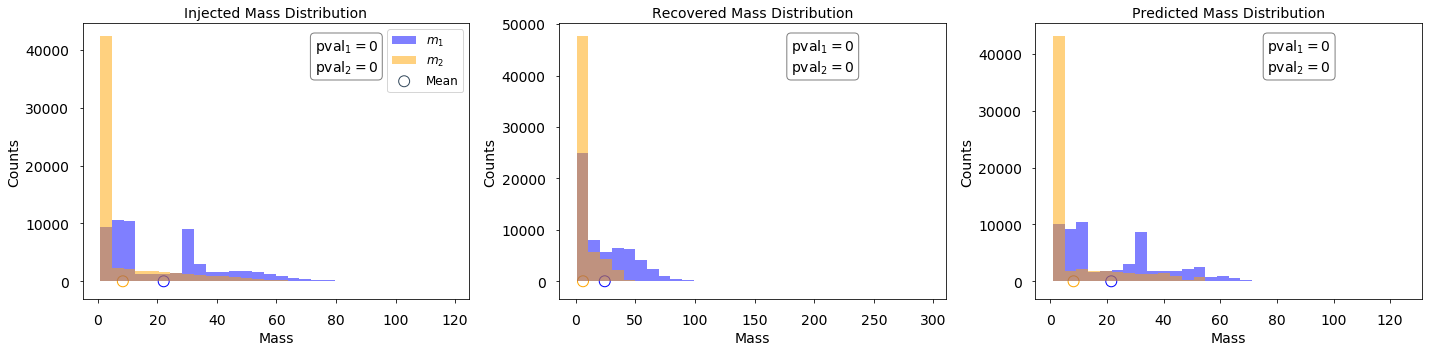

In [92]:
fig, axis = plt.subplots(1,3, figsize=(20,5))

combined_epsilons = [ytest[:,0], ytest[:,1]]
hist, bins, _ = axis[0].hist(combined_epsilons, 30)
axis[0].clear()
axis[0].set_title(r'Injected Mass Distribution', fontsize=14)
axis[0].set_xlabel(r'Mass', fontsize=14)
axis[0].set_ylabel(r'Counts', fontsize=14)
axis[0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_1$','$m_2$']
color = ['blue','orange']
for i in range(len(combined_epsilons)):
    axis[0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)

axis[0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='Mean')
axis[0].legend(ncol = 1, loc="upper right", fontsize=12)

###############
combined_epsilons = [xtest[:,0], xtest[:,1]]

hist, bins, _ = axis[1].hist(combined_epsilons, 30)
axis[1].clear()
axis[1].set_title(r'Recovered Mass Distribution', fontsize=14)
axis[1].set_xlabel(r'Mass', fontsize=14)
axis[1].set_ylabel(r'Counts', fontsize=14)
axis[1].tick_params(axis='both', which='major', labelsize=14, pad=10)
for i in range(len(combined_epsilons)):
    axis[1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)


axis[1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='Mean')

###############
combined_epsilons = [predicted_data[:,0], predicted_data[:,1]]
hist, bins, _ = axis[2].hist(combined_epsilons, 30)
axis[2].clear()
axis[2].set_title(r'Predicted Mass Distribution', fontsize=14)
axis[2].set_xlabel(r'Mass', fontsize=14)
axis[2].set_ylabel(r'Counts', fontsize=14)
axis[2].tick_params(axis='both', which='major', labelsize=14, pad=10)
for i in range(len(combined_epsilons)):
    axis[2].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[2].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)


axis[2].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='Mean')

# This is just showing how 
shap_inj1 = stats.shapiro(ytest[:5000,0]) #injected
shap_rec1 = stats.shapiro(xtest[:5000,0]) #recovered
shap_pred1 = stats.shapiro(predicted_data[:4000,0]) #predicted

shap_inj2 = stats.shapiro(ytest[:5000,1]) #injected
shap_rec2 = stats.shapiro(xtest[:5000,1]) #recovered
shap_pred2 = stats.shapiro(predicted_data[:4000,1]) #predicted

textstr1 = '\n'.join((
    r'$\mathrm{pval}_1=%g$' % (shap_inj1.pvalue, ),
    r'$\mathrm{pval}_2=%g$' % (shap_inj2.pvalue, )))
textstr2 = '\n'.join((
    r'$\mathrm{pval}_1=%g$' % (shap_rec1.pvalue, ),
    r'$\mathrm{pval}_2=%g$' % (shap_rec2.pvalue, )))
textstr3 = '\n'.join((
    r'$\mathrm{pval}_1=%g$' % (shap_pred1.pvalue, ),
    r'$\mathrm{pval}_2=%g$' % (shap_pred2.pvalue, )))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

axis[0].text(0.6, 0.95, textstr1, transform=axis[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
axis[1].text(0.6, 0.95, textstr2, transform=axis[1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
axis[2].text(0.6, 0.95, textstr3, transform=axis[2].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

print('Since all the p-values are 0, the mass data was not drawn from a normal distribution. \nThis can be seen in the plots below')
plt.tight_layout()
plt.show()

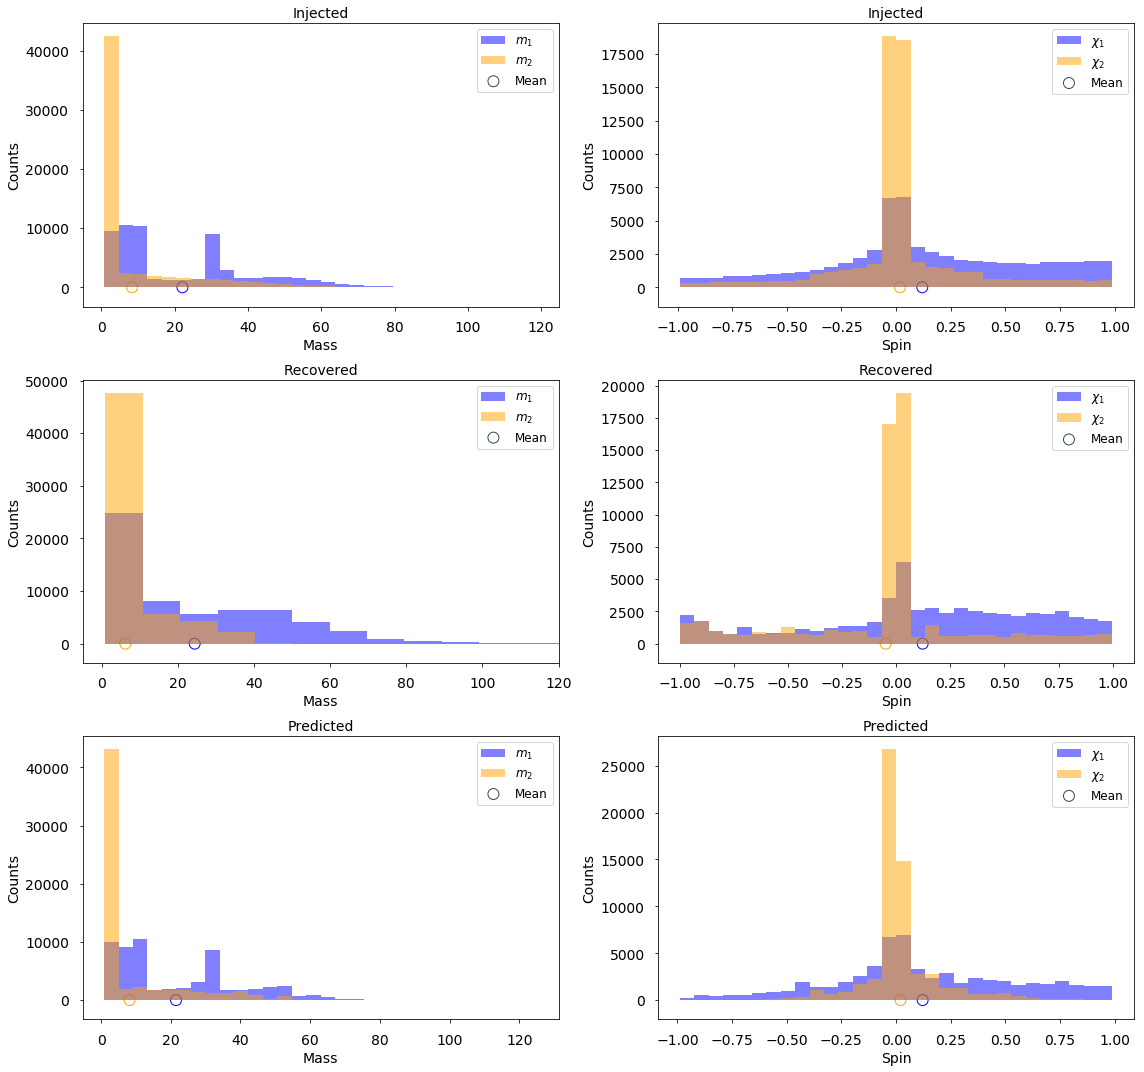

In [93]:
fig, axis = plt.subplots(3,2, figsize=(16,15))

combined_epsilons = [ytest[:,0], ytest[:,1]]

hist, bins, _ = axis[0,0].hist(combined_epsilons, 30)
axis[0,0].clear()
axis[0,0].set_title(r'Injected', fontsize=14)
axis[0,0].set_xlabel(r'Mass', fontsize=14)
axis[0,0].set_ylabel(r'Counts', fontsize=14)
axis[0,0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_1$','$m_2$']

color = ['blue','orange']
for i in range(len(combined_epsilons)):
    axis[0,0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0,0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)

axis[0,0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='Mean')

axis[0,0].legend(ncol = 1, loc="upper right", fontsize=12)

combined_epsilons = [ytest[:,2], ytest[:,3]]

hist, bins, _ = axis[0,1].hist(combined_epsilons, 30)
axis[0,1].clear()
axis[0,1].set_title(r'Injected', fontsize=14)
axis[0,1].set_xlabel(r'Spin', fontsize=14)
axis[0,1].set_ylabel(r'Counts', fontsize=14)
axis[0,1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$\chi_1$','$\chi_2$']

color = ['blue','orange']
for i in range(len(combined_epsilons)):
    axis[0,1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0,1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)

axis[0,1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='Mean')

axis[0,1].legend(ncol = 1, loc="upper right", fontsize=12)

###############
combined_epsilons = [xtest[:,0], xtest[:,1]]

hist, bins, _ = axis[1,0].hist(combined_epsilons, 30)
axis[1,0].clear()
axis[1,0].set_title(r'Recovered', fontsize=14)
axis[1,0].set_xlabel(r'Mass', fontsize=14)
axis[1,0].set_ylabel(r'Counts', fontsize=14)
axis[1,0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_1$','$m_2$']

color = ['blue','orange']
for i in range(len(combined_epsilons)):
    axis[1,0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1,0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)


axis[1,0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='Mean')

axis[1,0].legend(ncol = 1, loc="upper right", fontsize=12)

combined_epsilons = [xtest[:,2], xtest[:,3]]

hist, bins, _ = axis[1,1].hist(combined_epsilons, 30)
axis[1,1].clear()
axis[1,1].set_title(r'Recovered', fontsize=14)
axis[1,1].set_xlabel(r'Spin', fontsize=14)
axis[1,1].set_ylabel(r'Counts', fontsize=14)
axis[1,1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$\chi_1$','$\chi_2$']

color = ['blue','orange']
for i in range(len(combined_epsilons)):
    axis[1,1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1,1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)


axis[1,1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='Mean')

axis[1,1].legend(ncol = 1, loc="upper right", fontsize=12)
###############
combined_epsilons = [predicted_data[:,0], predicted_data[:,1]]

hist, bins, _ = axis[2,0].hist(combined_epsilons, 30)
axis[2,0].clear()
axis[2,0].set_title(r'Predicted', fontsize=14)
axis[2,0].set_xlabel(r'Mass', fontsize=14)
axis[2,0].set_ylabel(r'Counts', fontsize=14)
axis[2,0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_1$','$m_2$']

color = ['blue','orange']
for i in range(len(combined_epsilons)):
    axis[2,0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[2,0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)


axis[2,0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='Mean')

axis[2,0].legend(ncol = 1, loc="upper right", fontsize=12)

combined_epsilons = [predicted_data[:,2], predicted_data[:,3]]

hist, bins, _ = axis[2,1].hist(combined_epsilons, 30)
axis[2,1].clear()
axis[2,1].set_title(r'Predicted', fontsize=14)
axis[2,1].set_xlabel(r'Spin', fontsize=14)
axis[2,1].set_ylabel(r'Counts', fontsize=14)
axis[2,1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$\chi_1$','$\chi_2$']

color = ['blue','orange']
for i in range(len(combined_epsilons)):
    axis[2,1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[2,1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)


axis[2,1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='Mean')

axis[2,1].legend(ncol = 1, loc="upper right", fontsize=12)

#axis[0].set_xlim(0.9,2.4)
axis[1,0].set_xlim(-5,120)
#axis[2].set_xlim(0.9,2.4)
plt.tight_layout()
outfile = '../figs/m_chi_shapiro_test.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

In [94]:
print('m1 injected pval: ',stats.shapiro(ytest[:5000,0])[1])
print('m1 recovered pval: ',stats.shapiro(xtest[:5000,0])[1])
print('m1 predicted pval: ',stats.shapiro(predicted_data[:5000,0])[1])

print('m2 injected pval: ',stats.shapiro(ytest[:5000,1])[1])
print('m2 recovered pval: ',stats.shapiro(xtest[:5000,1])[1])
print('m2 predicted pval: ',stats.shapiro(predicted_data[:5000,1])[1])

print('chi1 injected pval: ',stats.shapiro(ytest[:5000,2])[1])
print('chi1 recovered pval: ',stats.shapiro(xtest[:5000,2])[1])
print('chi1 predicted pval: ',stats.shapiro(predicted_data[:5000,2])[1])

print('chi2 injected pval: ',stats.shapiro(ytest[:5000,3])[1])
print('chi2 recovered pval: ',stats.shapiro(xtest[:5000,3])[1])
print('chi2 predicted pval: ',stats.shapiro(predicted_data[:5000,3])[1])

print('\nThis just tells us that the primary spin values are closer to being a normal distribution than the \n'\
      'other 3 parameters which do not resemble a normal distribution at all. Note that the p-values for '\
      'the \ninjected and predicted are closer in order of magnitude than the recovered vaues.')

m1 injected pval:  0.0
m1 recovered pval:  0.0
m1 predicted pval:  0.0
m2 injected pval:  0.0
m2 recovered pval:  0.0
m2 predicted pval:  0.0
chi1 injected pval:  7.133443735813619e-28
chi1 recovered pval:  1.037160591455212e-34
chi1 predicted pval:  7.977023719650674e-26
chi2 injected pval:  0.0
chi2 recovered pval:  0.0
chi2 predicted pval:  0.0

This just tells us that the primary spin values are closer to being a normal distribution than the 
other 3 parameters which do not resemble a normal distribution at all. Note that the p-values for the 
injected and predicted are closer in order of magnitude than the recovered vaues.


In [95]:
n = np.linspace(3,5000,4998)

shap_inj1 = []; shap_rec1 = []; shap_pred1 = []
shap_inj2 = []; shap_rec2 = []; shap_pred2 = []
shap_inj3 = []; shap_rec3 = []; shap_pred3 = []
shap_inj4 = []; shap_rec4 = []; shap_pred4 = []


for k in n:
    shap_inj1.append(stats.shapiro(ytest[:int(k),0]).pvalue)
    shap_rec1.append(stats.shapiro(xtest[:int(k),0]).pvalue) #recovered
    shap_pred1.append(stats.shapiro(predicted_data[:int(k),0]).pvalue) #predicted

    shap_inj2.append(stats.shapiro(ytest[:int(k),1]).pvalue) #injected
    shap_rec2.append(stats.shapiro(xtest[:int(k),1]).pvalue) #recovered
    shap_pred2.append(stats.shapiro(predicted_data[:int(k),1]).pvalue) #predicted
    
    shap_inj3.append(stats.shapiro(ytest[:int(k),2]).pvalue)
    shap_rec3.append(stats.shapiro(xtest[:int(k),2]).pvalue) #recovered
    shap_pred3.append(stats.shapiro(predicted_data[:int(k),2]).pvalue) #predicted

    shap_inj4.append(stats.shapiro(ytest[:int(k),3]).pvalue) #injected
    shap_rec4.append(stats.shapiro(xtest[:int(k),3]).pvalue) #recovered
    shap_pred4.append(stats.shapiro(predicted_data[:int(k),3]).pvalue) #predicted

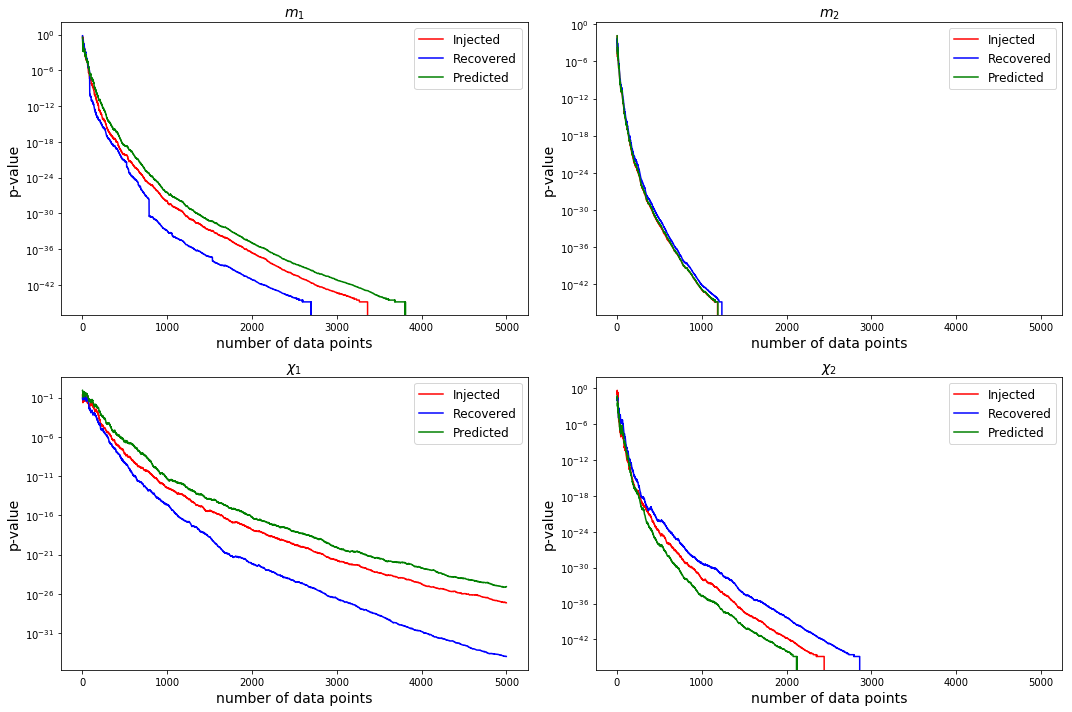

In [96]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0,0].plot(n, shap_inj1, 'r-', label='Injected')
ax[0,0].plot(n, shap_rec1, 'b-', label='Recovered')
ax[0,0].plot(n, shap_pred1, 'g-', label='Predicted')
ax[0,0].set_title('$m_1$', fontsize=14)
ax[0,0].set_xlabel('number of data points', fontsize=14)
ax[0,0].set_ylabel('p-value', fontsize=14)
ax[0,0].legend(fontsize=12)
ax[0,0].set_yscale('log')

ax[0,1].plot(n, shap_inj2, 'r-', label='Injected')
ax[0,1].plot(n, shap_rec2, 'b-', label='Recovered')
ax[0,1].plot(n, shap_pred2, 'g-', label='Predicted')
ax[0,1].set_title('$m_2$', fontsize=14)
ax[0,1].set_xlabel('number of data points', fontsize=14)
ax[0,1].set_ylabel('p-value', fontsize=14)
ax[0,1].legend(fontsize=12)
ax[0,1].set_yscale('log')

ax[1,0].plot(n, shap_inj3, 'r-', label='Injected')
ax[1,0].plot(n, shap_rec3, 'b-', label='Recovered')
ax[1,0].plot(n, shap_pred3, 'g-', label='Predicted')
ax[1,0].set_title('$\chi_1$', fontsize=14)
ax[1,0].set_xlabel('number of data points', fontsize=14)
ax[1,0].set_ylabel('p-value', fontsize=14)
ax[1,0].legend(fontsize=12)
ax[1,0].set_yscale('log')

ax[1,1].plot(n, shap_inj4, 'r-', label='Injected')
ax[1,1].plot(n, shap_rec4, 'b-', label='Recovered')
ax[1,1].plot(n, shap_pred4, 'g-', label='Predicted')
ax[1,1].set_title('$\chi_2$', fontsize=14)
ax[1,1].set_xlabel('number of data points', fontsize=14)
ax[1,1].set_ylabel('p-value', fontsize=14)
ax[1,1].legend(fontsize=12)
ax[1,1].set_yscale('log')

plt.tight_layout()
outfile = '../figs/m_chi_SW_test.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

## Epps-Singleton test

Test the null hypothesis that two samples have the same underlying probability distribution.

In [97]:
print(scipy.stats.epps_singleton_2samp(ytest[:,0], xtest[:,0]))
print(scipy.stats.epps_singleton_2samp(ytest[:,0], predicted_data[:,0]))

Epps_Singleton_2sampResult(statistic=708.3582011686573, pvalue=5.4003065566464565e-152)
Epps_Singleton_2sampResult(statistic=361.4823297007071, pvalue=5.81517461484262e-77)


In [98]:
print(scipy.stats.epps_singleton_2samp(ytest[:,1], xtest[:,1]))
print(scipy.stats.epps_singleton_2samp(ytest[:,1], predicted_data[:,1]))

Epps_Singleton_2sampResult(statistic=1560.7596570220092, pvalue=0.0)
Epps_Singleton_2sampResult(statistic=100.7335715070484, pvalue=6.865390850366593e-21)


In [99]:
print(scipy.stats.epps_singleton_2samp(ytest[:,2], xtest[:,2]))
print(scipy.stats.epps_singleton_2samp(ytest[:,2], predicted_data[:,2]))

Epps_Singleton_2sampResult(statistic=3044.8490242673993, pvalue=0.0)
Epps_Singleton_2sampResult(statistic=669.8608396293264, pvalue=1.1690045072388177e-143)


In [100]:
print(scipy.stats.epps_singleton_2samp(ytest[:,3], xtest[:,3]))
print(scipy.stats.epps_singleton_2samp(ytest[:,3], predicted_data[:,3]))

Epps_Singleton_2sampResult(statistic=256.96000681497696, pvalue=2.0608490736663062e-54)
Epps_Singleton_2sampResult(statistic=869.4675596945957, pvalue=6.866565148143317e-187)


## Kolmogorov-Smirnov test

This test compares the underlying continuous distributions F(x) and G(x) of two independent samples.

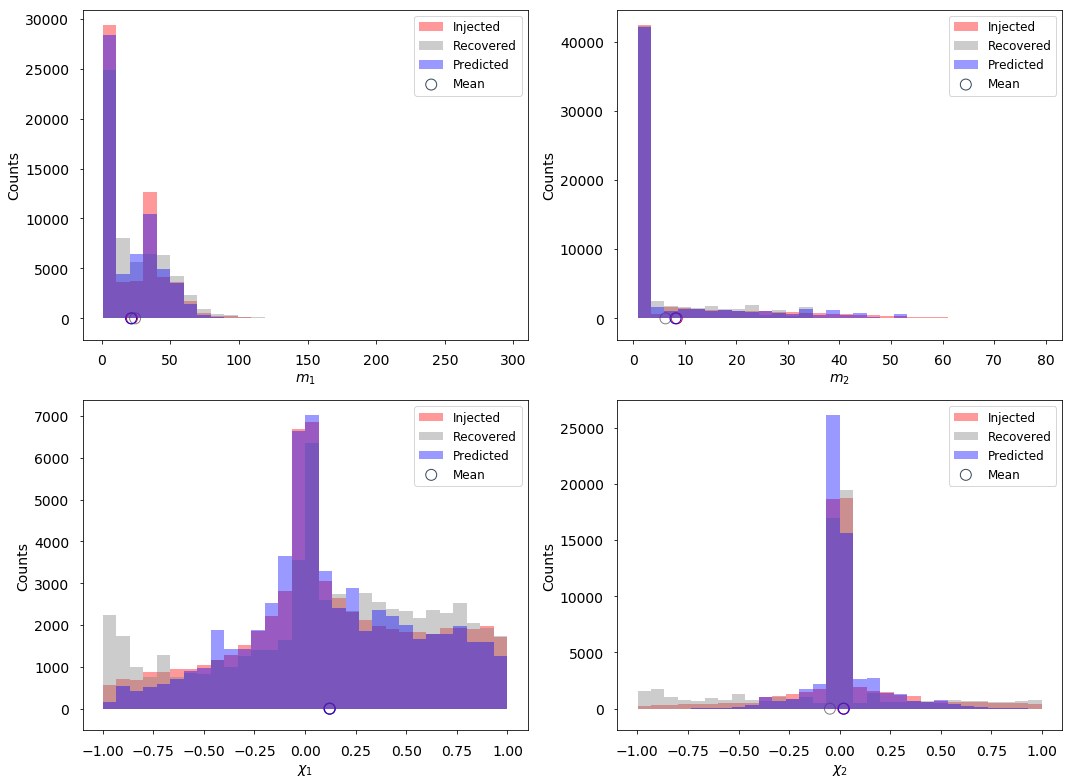

In [101]:
fig, axis = plt.subplots(2,2, figsize=(15,11))

combined_epsilons = [ytest[:,0], xtest[:,0], predicted_data[:,0]]

hist, bins, _ = axis[0,0].hist(combined_epsilons, 30)
axis[0,0].clear()
axis[0,0].set_xlabel(r'$m_1$', fontsize=14)
axis[0,0].set_ylabel(r'Counts', fontsize=14)
axis[0,0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-', '-']
labels = ['Injected','Recovered','Predicted']

color = ['red','gray','blue']
for i in range(len(combined_epsilons)):
    axis[0,0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.4)
    point = axis[0,0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)

axis[0,0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='Mean')
axis[0,0].legend(ncol = 1, loc="upper right", fontsize=12)
#####################

combined_epsilons = [ytest[:,1], xtest[:,1], predicted_data[:,1]]

hist, bins, _ = axis[0,1].hist(combined_epsilons, 30)
axis[0,1].clear()
axis[0,1].set_xlabel(r'$m_2$', fontsize=14)
axis[0,1].set_ylabel(r'Counts', fontsize=14)
axis[0,1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-', '-']
labels = ['Injected','Recovered','Predicted']

color = ['red','gray','blue']
for i in range(len(combined_epsilons)):
    axis[0,1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.4)
    point = axis[0,1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)

axis[0,1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='Mean')
axis[0,1].legend(ncol = 1, loc="upper right", fontsize=12)
#####################

combined_epsilons = [ytest[:,2], xtest[:,2], predicted_data[:,2]]

hist, bins, _ = axis[1,0].hist(combined_epsilons, 30)
axis[1,0].clear()
axis[1,0].set_xlabel(r'$\chi_1$', fontsize=14)
axis[1,0].set_ylabel(r'Counts', fontsize=14)
axis[1,0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-', '-']
labels = ['Injected','Recovered','Predicted']

color = ['red','gray','blue']
for i in range(len(combined_epsilons)):
    axis[1,0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.4)
    point = axis[1,0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)

axis[1,0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='Mean')
axis[1,0].legend(ncol = 1, loc="upper right", fontsize=12)
#####################

combined_epsilons = [ytest[:,3], xtest[:,3], predicted_data[:,3]]

hist, bins, _ = axis[1,1].hist(combined_epsilons, 30)
axis[1,1].clear()
axis[1,1].set_xlabel(r'$\chi_2$', fontsize=14)
axis[1,1].set_ylabel(r'Counts', fontsize=14)
axis[1,1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-', '-']
labels = ['Injected','Recovered','Predicted']

color = ['red','gray','blue']
for i in range(len(combined_epsilons)):
    axis[1,1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.4)
    point = axis[1,1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)

axis[1,1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='Mean')
axis[1,1].legend(ncol = 1, loc="upper right", fontsize=12)
plt.tight_layout()
outfile = '../figs/m_chi_KS_test.pdf'
plt.savefig(outfile, bbox_inches="tight")
outfile = '../figs/m_chi_KS_test.png'
plt.savefig(outfile, bbox_inches="tight")
outfile = '../figs/m_chi_KS_test.eps'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

In [102]:
scipy.stats.ks_2samp(ytest[:,0], xtest[:,0], alternative='two-sided', mode='auto')
# we are testing if the dist of injected values are equal to the recovered here, and since the 
# p-value is 0, it is telling us "absolutely not! they are quite different!"

KstestResult(statistic=0.09451824197069947, pvalue=1.0461753213134332e-233)

In [72]:
scipy.stats.ks_2samp(ytest[:,0], xtest[:,0], alternative='less', mode='auto')
# we are testing if the injected values are typically less than recovered here, and since the 
# p-value is 1.0, it is telling us "definitely yes!"

KstestResult(statistic=0.07845130752179205, pvalue=3.925305409105454e-161)

In [73]:
scipy.stats.ks_2samp(ytest[:,0], xtest[:,0], alternative='greater', mode='auto')
# we are testing if injected values are greater than recovered here, and since the 
# p-value is 0, it is telling us "absolutely not!"

KstestResult(statistic=0.09451824197069947, pvalue=1.4841737347184156e-233)

In [103]:
scipy.stats.ks_2samp(ytest[:,0], predicted_data[:,0], alternative='two-sided', mode='auto')
# we are testing if the injected values are equal to the predicted here, and since the 
# p-value is small, it is telling us "they are not completely different, but not the 
# same. there is some overlap!"

KstestResult(statistic=0.04225070417840293, pvalue=5.682595024664349e-47)

In [104]:
scipy.stats.ks_2samp(ytest[:,0], predicted_data[:,0], alternative='less', mode='auto')
# we are testing if the injected values are less than predicted here, and since the 
# p-value is small, it is telling us "this is true sometimes, there is some overlap!"

KstestResult(statistic=0.04225070417840293, pvalue=2.926226105707966e-47)

In [105]:
scipy.stats.ks_2samp(ytest[:,0], predicted_data[:,0], alternative='greater', mode='auto')
# we are testing if injected values are greater than predicted here, and since the 
# p-value is very small, it is telling us "not always true!"

KstestResult(statistic=0.02873381223020388, pvalue=2.977386638371124e-22)

In [106]:
print(scipy.stats.ks_2samp(ytest[:,1], xtest[:,1], alternative='two-sided', mode='auto'))
print(scipy.stats.ks_2samp(ytest[:,1], xtest[:,1], alternative='less', mode='auto'))
print(scipy.stats.ks_2samp(ytest[:,1], xtest[:,1], alternative='greater', mode='auto'))

print(scipy.stats.ks_2samp(ytest[:,1], predicted_data[:,1], alternative='two-sided', mode='auto'))
print(scipy.stats.ks_2samp(ytest[:,1], predicted_data[:,1], alternative='less', mode='auto'))
print(scipy.stats.ks_2samp(ytest[:,1], predicted_data[:,1], alternative='greater', mode='auto'))

KstestResult(statistic=0.25257087618126967, pvalue=0.0)
KstestResult(statistic=0.25257087618126967, pvalue=0.0)
KstestResult(statistic=0.14801913365222757, pvalue=0.0)
KstestResult(statistic=0.026583776396273184, pvalue=7.510936532583553e-19)
KstestResult(statistic=0.01785029750495848, pvalue=4.892712786021621e-09)
KstestResult(statistic=0.026583776396273184, pvalue=3.7487019689007457e-19)


In [107]:
print(scipy.stats.ks_2samp(ytest[:,2], xtest[:,2], alternative='two-sided', mode='auto'))
print(scipy.stats.ks_2samp(ytest[:,2], xtest[:,2], alternative='less', mode='auto'))
print(scipy.stats.ks_2samp(ytest[:,2], xtest[:,2], alternative='greater', mode='auto'))

print(scipy.stats.ks_2samp(ytest[:,2], predicted_data[:,2], alternative='two-sided', mode='auto'))
print(scipy.stats.ks_2samp(ytest[:,2], predicted_data[:,2], alternative='less', mode='auto'))
print(scipy.stats.ks_2samp(ytest[:,2], predicted_data[:,2], alternative='greater', mode='auto'))

KstestResult(statistic=0.09070151169186152, pvalue=3.2535883946844513e-215)
KstestResult(statistic=0.05708428473807897, pvalue=1.1606421062419304e-85)
KstestResult(statistic=0.09070151169186152, pvalue=3.9253944967805933e-215)
KstestResult(statistic=0.03128385473091218, pvalue=6.088372901751398e-26)
KstestResult(statistic=0.02501708361806032, pvalue=4.7984213892013617e-17)
KstestResult(statistic=0.03128385473091218, pvalue=3.0530260099592713e-26)


In [108]:
print(scipy.stats.ks_2samp(ytest[:,3], xtest[:,3], alternative='two-sided', mode='auto'))
print(scipy.stats.ks_2samp(ytest[:,3], xtest[:,3], alternative='less', mode='auto'))
print(scipy.stats.ks_2samp(ytest[:,3], xtest[:,3], alternative='greater', mode='auto'))

print(scipy.stats.ks_2samp(ytest[:,3], predicted_data[:,3], alternative='two-sided', mode='auto'))
print(scipy.stats.ks_2samp(ytest[:,3], predicted_data[:,3], alternative='less', mode='auto'))
print(scipy.stats.ks_2samp(ytest[:,3], predicted_data[:,3], alternative='greater', mode='auto'))

KstestResult(statistic=0.09971832863881065, pvalue=3.868657876080934e-260)
KstestResult(statistic=0.09971832863881065, pvalue=7.082632097551234e-260)
KstestResult(statistic=0.030783846397439918, pvalue=1.9661536698576077e-25)
KstestResult(statistic=0.12415206920115329, pvalue=0.0)
KstestResult(statistic=0.12415206920115329, pvalue=0.0)
KstestResult(statistic=0.103168386139769, pvalue=4.0681048859803323e-278)


Analysis: 
- The distribution of the injected and predicted values for mass 1 are relatively similar to each other and completely different from the recovered values. Sometimes the injected value is larger than the predicted but not always.
- The injected and recovered distributions are completely different, but the injected and predicted distributions are somewhat similar with the injected distribution usually being smaller than the predicted distribution. 
- For spin 1, the injected distribution tends to be greater than the recovered distribution but they are not  similar. However, the injected and predicted distributions are similar with the injected usually being less than the predicted distribution. These distributions are the most similar of all. 
- The injectced distribution for spin 2 is usually greater than the recovered but the distribution itseld is not similar at all. Surprisingly, the predicted distribution is also not at all similar and sometimes greater than the injectced distribution. 

Conclusion: For all cases, the injected distributions are different than the recovered distributions. In the case of masses, the injected and predicted distribution are slightly similar with the injected distribution of the second mass being usually less than the predicted. For the spins, the injected and predicted distributions of spin 1 are similar but for spin2 they are completely different

## T-test

This is a test for the null hypothesis that two independent samples have identical average (expected) values.

In [109]:
print(scipy.stats.ttest_ind(ytest[:,0], xtest[:,0], equal_var=False, alternative='two-sided'))
print(scipy.stats.ttest_ind(ytest[:,0], xtest[:,0], equal_var=False, alternative='greater'))
print(scipy.stats.ttest_ind(ytest[:,0], xtest[:,0], equal_var=False, alternative='less'))

print(scipy.stats.ttest_ind(ytest[:,0], predicted_data[:,0], equal_var=False, alternative='two-sided'))
print(scipy.stats.ttest_ind(ytest[:,0], predicted_data[:,0], equal_var=False, alternative='greater'))
print(scipy.stats.ttest_ind(ytest[:,0], predicted_data[:,0], equal_var=False, alternative='less'))

Ttest_indResult(statistic=-18.623180556790288, pvalue=2.695900528083758e-77)
Ttest_indResult(statistic=-18.623180556790288, pvalue=1.0)
Ttest_indResult(statistic=-18.623180556790288, pvalue=1.347950264041879e-77)
Ttest_indResult(statistic=5.769891161605367, pvalue=7.95181636027941e-09)
Ttest_indResult(statistic=5.769891161605367, pvalue=3.975908180139705e-09)
Ttest_indResult(statistic=5.769891161605367, pvalue=0.9999999960240918)


In [110]:
print(scipy.stats.ttest_ind(ytest[:,1], xtest[:,1], equal_var=False, alternative='two-sided'))
print(scipy.stats.ttest_ind(ytest[:,1], xtest[:,1], equal_var=False, alternative='greater'))
print(scipy.stats.ttest_ind(ytest[:,1], xtest[:,1], equal_var=False, alternative='less'))

print(scipy.stats.ttest_ind(ytest[:,1], predicted_data[:,1], equal_var=False, alternative='two-sided'))
print(scipy.stats.ttest_ind(ytest[:,1], predicted_data[:,1], equal_var=False, alternative='greater'))
print(scipy.stats.ttest_ind(ytest[:,1], predicted_data[:,1], equal_var=False, alternative='less'))

Ttest_indResult(statistic=33.38671694248145, pvalue=4.0519996473740156e-243)
Ttest_indResult(statistic=33.38671694248145, pvalue=2.0259998236870078e-243)
Ttest_indResult(statistic=33.38671694248145, pvalue=1.0)
Ttest_indResult(statistic=3.1998962000586952, pvalue=0.0013751293674417174)
Ttest_indResult(statistic=3.1998962000586952, pvalue=0.0006875646837208587)
Ttest_indResult(statistic=3.1998962000586952, pvalue=0.9993124353162791)


In [111]:
print(scipy.stats.ttest_ind(ytest[:,2], xtest[:,2], equal_var=False, alternative='two-sided'))
print(scipy.stats.ttest_ind(ytest[:,2], xtest[:,2], equal_var=False, alternative='greater'))
print(scipy.stats.ttest_ind(ytest[:,2], xtest[:,2], equal_var=False, alternative='less'))

print(scipy.stats.ttest_ind(ytest[:,2], predicted_data[:,2], equal_var=False, alternative='two-sided'))
print(scipy.stats.ttest_ind(ytest[:,2], predicted_data[:,2], equal_var=False, alternative='greater'))
print(scipy.stats.ttest_ind(ytest[:,2], predicted_data[:,2], equal_var=False, alternative='less'))

Ttest_indResult(statistic=-1.0151531507920166, pvalue=0.31003490890301033)
Ttest_indResult(statistic=-1.0151531507920166, pvalue=0.8449825455484948)
Ttest_indResult(statistic=-1.0151531507920166, pvalue=0.15501745445150517)
Ttest_indResult(statistic=-0.7721894297215712, pvalue=0.4400037724005803)
Ttest_indResult(statistic=-0.7721894297215712, pvalue=0.7799981137997098)
Ttest_indResult(statistic=-0.7721894297215712, pvalue=0.22000188620029015)


In [112]:
print(scipy.stats.ttest_ind(ytest[:,3], xtest[:,3], equal_var=False, alternative='two-sided'))
print(scipy.stats.ttest_ind(ytest[:,3], xtest[:,3], equal_var=False, alternative='greater'))
print(scipy.stats.ttest_ind(ytest[:,3], xtest[:,3], equal_var=False, alternative='less'))

print(scipy.stats.ttest_ind(ytest[:,3], predicted_data[:,3], equal_var=False, alternative='two-sided'))
print(scipy.stats.ttest_ind(ytest[:,3], predicted_data[:,3], equal_var=False, alternative='greater'))
print(scipy.stats.ttest_ind(ytest[:,3], predicted_data[:,3], equal_var=False, alternative='less'))

Ttest_indResult(statistic=33.48312761078001, pvalue=1.4278371851052901e-244)
Ttest_indResult(statistic=33.48312761078001, pvalue=7.1391859255264506e-245)
Ttest_indResult(statistic=33.48312761078001, pvalue=1.0)
Ttest_indResult(statistic=-2.3310150376989207, pvalue=0.019754650912996573)
Ttest_indResult(statistic=-2.3310150376989207, pvalue=0.9901226745435018)
Ttest_indResult(statistic=-2.3310150376989207, pvalue=0.009877325456498286)


In [ ]:
# the mean of the first distribution is less than the mean of the second distribution